<h2>Performing Basic Frequency Analysis</h2>
Let's start by using some very basic frequency analysis on a document to see if we can determine what the document is about based on word frequency.

**Load a Text Document**
<br>Run the cell below to load a document and view the text it contains.

In [5]:
with open('Moon.txt', 'r') as doc1:
    # Read the document
    doc1Txt = doc1.read()
    
# print its contents
print(doc1Txt)

We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

<h3><b>Normalizing the Text:</b></h3>

Text Normalization is often the next step after loading the text document, text-normalization is the process of transforming a piece of text into a canonical (official) form. Normalization includes a variety activities such as:-
* Tokenization
* Parts of speech tagging
* Phrase chunking
* Remove Punctuations
* Stemming
* Lemmatization
* Spell check
* Lowercase
* Remove Stopwords
* Expand Contractions

Stemming usually refers to a crude heuristic process that chops off the ends of words and often includes the removal of derivational affixes. Lemmatization usually refers to the use of a vocabulary and morphological analysis of words, normally aiming to remove inflections only and to return the base or dictionary form of a word, which is known as the lemma.
<br> [link](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

For this exercise, we shall perform the following text-normalization activities;-
1. Remove Punctuation
2. Change to Lowercase
3. Remove Stopwords
4. Stemming
5. Tokenization.

In [6]:
# Let's import some much needed libraries

from nltk.stem.porter import PorterStemmer  # for stemming the words
from string import punctuation  # Import the string of punctuations
import math
from textblob import TextBlob as tb  # import textblob
from nltk.corpus import stopwords  # import stopwords
import matplotlib.pyplot as plt  # for plotting charts
import nltk  # The natural language toolkit library
import pandas as pd  # for making Dataframes
from nltk.probability import FreqDist  # The frequency distribution module

print('All modules imported!')

All modules imported!


<br>**1. Remove Punctuations and Digits:**<br>

Text includes a lot of punctuation, which we need to remove if we want to work only with the actual words. We shall go  step further and also remove numbers from the text

In [7]:
from string import punctuation

# First remove digits
doc1Txt = ''.join(c for c in doc1Txt if not c.isdigit())

In [8]:
# Next we remove Punctuations
doc1Txt = ''.join(c for c in doc1Txt if c not in punctuation)

**2. Change to Lowercase:**

In [9]:
doc1Txt = ''.join(c.lower() for c in doc1Txt)

**3. Remove Stopwords:**

<br>A large number of the words in the text are common words like "the" or "and". These "stopwords" add little in the way of semantic meaning to the text, and won't help us determine the subject matter - so run the cell below to remove them.

In [10]:
# Remove Stopwords

# First download the 'stopwords' from nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
doc1Txt = ' '.join(word for word in doc1Txt.split() if word not in (stopwords.words('english')))
print("\n")
print(doc1Txt)



set sail new sea new knowledge gained new rights must used progress people space science like nuclear science technology conscience whether become force good ill depends man united states occupies position preeminence help decide whether new ocean sea peace new terrifying theater war say go unprotected hostile misuse space go unprotected hostile use land sea say space explored mastered without feeding fires war without repeating mistakes man made extending writ around globe strife prejudice national conflict outer space yet hazards hostile us conquest deserves best mankind opportunity peaceful cooperation may never come say moon choose goal may well ask climb highest mountain years ago fly atlantic rice play texas choose go moon choose go moon decade things easy hard goal serve organize measure best energies skills challenge one willing accept one unwilling postpone one intend win


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**4. Tokenization:**
    
Get the Frequency Distribution
Now let's tokenize the text (split it into individual words), and count the number of times each word occurs.

In [11]:
nltk.download("punkt")

# Tokenize the text into individual words
moon_words = nltk.tokenize.word_tokenize(doc1Txt)
moon_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['set',
 'sail',
 'new',
 'sea',
 'new',
 'knowledge',
 'gained',
 'new',
 'rights',
 'must',
 'used',
 'progress',
 'people',
 'space',
 'science',
 'like',
 'nuclear',
 'science',
 'technology',
 'conscience',
 'whether',
 'become',
 'force',
 'good',
 'ill',
 'depends',
 'man',
 'united',
 'states',
 'occupies',
 'position',
 'preeminence',
 'help',
 'decide',
 'whether',
 'new',
 'ocean',
 'sea',
 'peace',
 'new',
 'terrifying',
 'theater',
 'war',
 'say',
 'go',
 'unprotected',
 'hostile',
 'misuse',
 'space',
 'go',
 'unprotected',
 'hostile',
 'use',
 'land',
 'sea',
 'say',
 'space',
 'explored',
 'mastered',
 'without',
 'feeding',
 'fires',
 'war',
 'without',
 'repeating',
 'mistakes',
 'man',
 'made',
 'extending',
 'writ',
 'around',
 'globe',
 'strife',
 'prejudice',
 'national',
 'conflict',
 'outer',
 'space',
 'yet',
 'hazards',
 'hostile',
 'us',
 'conquest',
 'deserves',
 'best',
 'mankind',
 'opportunity',
 'peaceful',
 'cooperation',
 'may',
 'never',
 'come',
 'sa

**Let's get the frequency distribution count using the FreqDist service**

In [12]:
fdist = FreqDist(moon_words)
fdist

FreqDist({'new': 5, 'space': 4, 'go': 4, 'sea': 3, 'say': 3, 'hostile': 3, 'moon': 3, 'choose': 3, 'one': 3, 'science': 2, ...})

In [13]:
type(fdist)

nltk.probability.FreqDist

**Let's make it a DataFrame**

In [14]:
moon_df = pd.DataFrame(fdist, index=[0]).T
moon_df.columns = ['Count']

moon_df.head()

,Count
set,1
sail,1
new,5
sea,3
knowledge,1


**Visualize Word Frequency**

It's often easier to analyze frequency by creating a visualization, such as a Pareto chart.

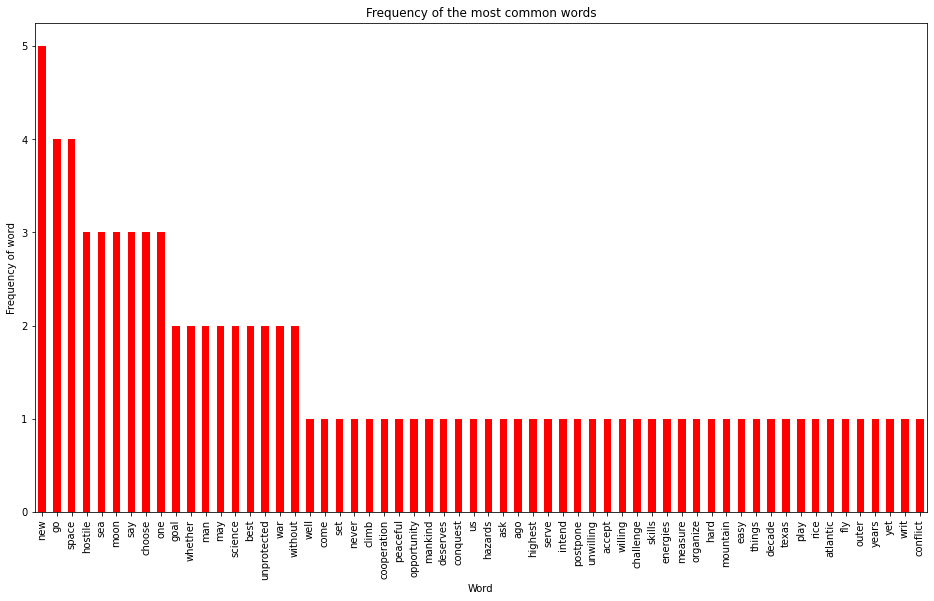

In [15]:
moon_df.sort_values('Count', ascending = False, inplace=True)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
moon_df['Count'][:60].plot(kind = 'bar', ax = ax, color="red")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

We can now see the most common words of the Moon speech, in a pareto chart, showing the highest frequencies first. These words are:
* new
* go
* space
* hostile

**5. Stemming**

Until now, we've simply counted the number of occurrances of each word. This doesn't take into account the fact that sometimes multiple words may be based on the same common base, or stem; and may be semantically equivalent. For example, "fishes", "fished", "fishing", and "fisher" are all derived from the stem "fish".

So let's stem the words so we can perform feature extraction

In [16]:
# Get the word stems
ps = PorterStemmer()
doc1Txt = [ps.stem(word) for word in moon_words]

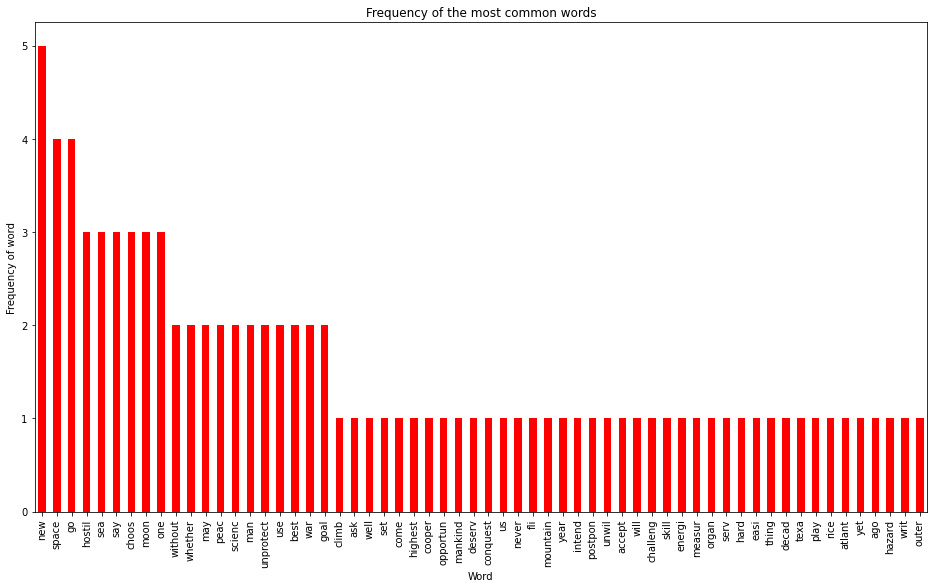

In [17]:
# Get Frequency distribution
fdist = FreqDist(doc1Txt)
moon_df = pd.DataFrame(fdist, index =[0]).T
moon_df.columns = ['Count']

# Plot frequency
moon_df.sort_values('Count', ascending = False, inplace=True)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
moon_df['Count'][:60].plot(kind = 'bar', ax = ax, color="red")
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

<h3><b>Feature Extraction:</b></h3>

Feature extraction is the next process, after text-normalization phase. Generally, feature-extraction for text data has two main steps
1. Define Vocabulary
2. Vectorize Documents

Step 1 basically has to do with identifying words based on their frequency and record them as a vocabulary, using a distribution, just as we did in tokenization and frequency distribution above. 

For step 2, we shall vectorize the text using TF-IDF algorithm.

As stated above, TF-IDF shows the relative importance of a word or words to a document, given a collection of documents. Therefore, we need to download a few more documents.
<br>This also implies normalizing each downloaded document just as we did with the Moon.txt above. Remember that in programming, the moment you start repeating code, then it's time to write a function.

So let's write a function that performs the five normalizing steps above for a list of documents, and for uniformity's sakes, let's apply it to all 4 documents

In [18]:
def normalize_docs(doc_list):
    """Normalizes a list of text docs
    
    Normalization here includes 4 steps:
    1. Removing Punctuations
    2. Removing Numbers
    3. Setting to Lowercase
    4. Removing Stopwords
    
    :@Param doc: A list of text document
    :@Return: The doc_list fully normalized
    """
    normalized = []
    
    for doc in doc_list:
        # To remove punctuations
        doc = ''.join(c for c in doc if c not in punctuation)
        # To remove Numbers
        doc = ''.join(c for c in doc if not c.isdigit())
        # To set to lowercase
        doc = ''.join(c.lower() for c in doc)
        # To remove stopwords
        doc = ' '.join(word for word in doc.split() if word not in (stopwords.words('english')))
        # append to normalised list
        normalized.append(doc)
        
    return normalized
    

let's read in all the docs as follows, best to do so with a simple method.

In [51]:
doc_names = ['Moon.txt','Inaugural.txt','Cognitive.txt', 'Gettysburg.txt']

def read_docs(doc_names):
    """Read bytes of documents from a list
    
    @Param doclist: List of documents
    @return: read documents as texts
    """
    output = []
    for i in doc_names:
        try:
            with open(i, 'r', encoding='utf-16') as f:
                docs = f.read()
        except:
            with open(i, 'r') as f:
                docs = f.read()
        output.append(docs)
    return output

In [52]:
doc_list = read_docs(doc_names)
doc_list = normalize_docs(doc_list)

In [53]:
doc1Txt, doc2Txt, doc3Txt, doc4Txt = doc_list

In [54]:
# Let's see one of the documents

doc4Txt

'four score seven years ago fathers brought forth continent new nation conceived liberty dedicated proposition men created equal engaged great civil war testing whether nation nation conceived dedicated long endure met great battlefield war come dedicate portion field final resting place gave lives nation might live altogether fitting proper larger sense dedicate consecrate hallow ground brave men living dead struggled consecrated far poor power add detract world little note long remember say never forget us living rather dedicated unfinished work fought thus far nobly advanced rather us dedicated great task remaining us honored dead take increased devotion cause gave last full measure devotion highly resolve dead shall died vain nation god shall new birth freedom government people people people shall perish earth'

In [55]:
type(doc4Txt)

str

<h3><b>Using Term Frequency - Inverse Document Frequency<b></h3>
    
In the previous example, we've used basic term frequency to determine each word's "importance" based on how often it appears in the document. When dealing with a large corpus of multiple documents, a more commonly used technique is term frequency, inverse document frequency (or TF-IDF) in which a score is calculated based on how often a word or term appears in one document compared to its more general frequency across the entire collection of documents. Using this technique, a high degree of relevance is assumed for words that appear frequently in a particular document, but relatively infrequently across a wide range of other documents.

**Get TF-IDF Values for the top five words in each document**

In [61]:

class Tfidf(object):
    """instantiate a Tfidf object to compute TF-IDF scores
        across a corpus of text documents.
    """
    def __init__(self, docs, doc_names):
        self.docs = docs
        self.doc_names = doc_names
        
    def _tf(self, word, doc):
        lenOfDoc = len(doc.words)
        if lenOfDoc < 1: return 0
        else: return doc.words.count(word) / lenOfDoc

    def _contains(self, word, docs):
        return sum(1 for doc in docs if word in doc.words)

    def _idf(self, word, docs):
        docsCount = self._contains(word, docs)
        if docsCount < 1 : return 0
        else: return math.log(len(docs) / docsCount)

    def tfidf(self):
        print('-----------------------------------------------------------')
        for i, doc in enumerate(docs):
            print("Top words in document {}".format(doc_names[i]))
            scores = {word: (self._tf(word,doc) * self._idf(word, docs)) for word in doc.words}
            sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
            for word, score in sorted_words[:5]:
                print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
            print()

In [62]:
# Create a collection of documents as textblobs
doc1 = tb(doc1Txt)
doc2 = tb(doc2Txt)
doc3 = tb(doc3Txt)
doc4 = tb(doc4Txt)
docs = [doc1, doc2, doc3, doc4]

In [63]:
type(doc1)

textblob.blob.TextBlob

Next, instantiate an object of the Tfidf class() and pass the list of documents to it

In [64]:
text_docs = Tfidf(docs, doc_names)

Next, call the tfidf() function on the object and have it print out the Top 5 TF-IDF words per document.
These are the wwords that are peculiar to the document and define the specific theme of the document.

In [65]:
text_docs.tfidf()

-----------------------------------------------------------
Top words in document Moon.txt
	Word: space, TF-IDF: 0.04077
	Word: sea, TF-IDF: 0.03058
	Word: moon, TF-IDF: 0.03058
	Word: choose, TF-IDF: 0.03058
	Word: go, TF-IDF: 0.02039

Top words in document Inaugural.txt
	Word: let, TF-IDF: 0.03187
	Word: sides, TF-IDF: 0.01593
	Word: pledge, TF-IDF: 0.01394
	Word: citizens, TF-IDF: 0.00996
	Word: free, TF-IDF: 0.00996

Top words in document Cognitive.txt
	Word: services, TF-IDF: 0.07296
	Word: microsoft, TF-IDF: 0.04864
	Word: cognitive, TF-IDF: 0.04864
	Word: apis, TF-IDF: 0.04864
	Word: developers, TF-IDF: 0.04864

Top words in document Gettysburg.txt
	Word: dedicated, TF-IDF: 0.04545
	Word: dead, TF-IDF: 0.03409
	Word: nation, TF-IDF: 0.02841
	Word: conceived, TF-IDF: 0.02273
	Word: dedicate, TF-IDF: 0.02273

